<a href="https://colab.research.google.com/github/talhaty/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2000-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('GOOG')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


Visualizing Closing Price

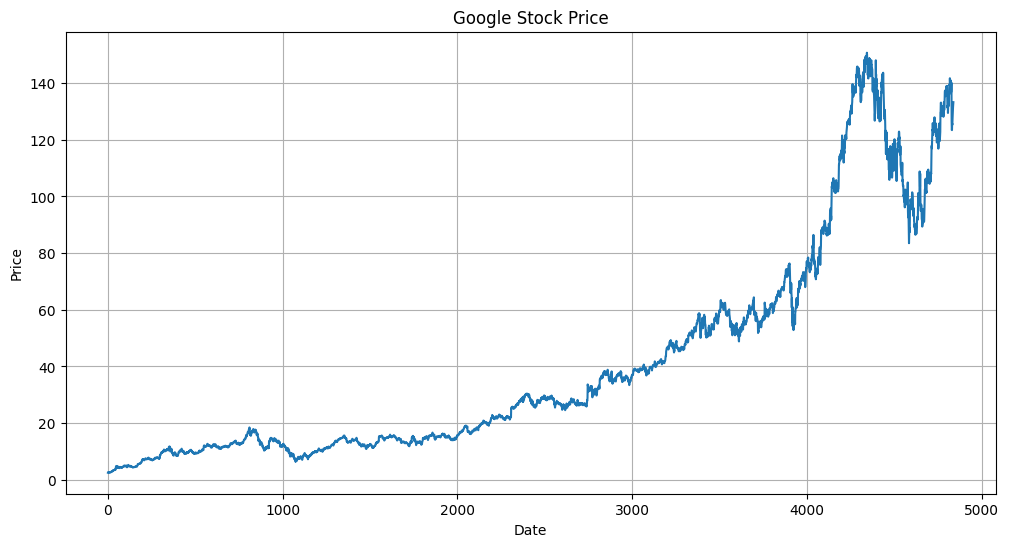

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Google Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4835,2023-11-02,129.559998,130.089996,128.110001,128.580002,128.580002,24091700
4836,2023-11-03,129.089996,130.729996,129.009995,130.369995,130.369995,19517900
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800


In [ ]:
df.shape

(4840, 7)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(3388, 7)
(1452, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3388,2018-02-02,56.099998,56.153500,55.363899,55.595001,55.595001,97158000
3389,2018-02-05,54.529999,55.500000,52.601501,52.790001,52.790001,75966000
3390,2018-02-06,51.359001,54.085499,51.156849,54.029999,54.029999,68960000
3391,2018-02-07,54.077000,54.089001,52.412998,52.429001,52.429001,47384000
3392,2018-02-08,52.770500,52.931000,50.033001,50.076000,50.076000,57182000


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[1.46004211e-04],
       [3.67179544e-03],
       [4.15398877e-03],
       ...,
       [9.89209832e-01],
       [9.94760347e-01],
       [9.92770983e-01]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(3288, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
103/103 [==============================] - 92s 730ms/step - loss: 0.0210 - mean_absolute_error: 0.0925
Epoch 2/10
103/103 [==============================] - 66s 644ms/step - loss: 0.0042 - mean_absolute_error: 0.0437
Epoch 3/10
103/103 [==============================] - 67s 648ms/step - loss: 0.0036 - mean_absolute_error: 0.0406
Epoch 4/10
103/103 [==============================] - 67s 647ms/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 5/10
103/103 [==============================] - 66s 641ms/step - loss: 0.0034 - mean_absolute_error: 0.0394
Epoch 6/10
103/103 [==============================] - 66s 642ms/step - loss: 0.0029 - mean_absolute_error: 0.0355
Epoch 7/10
103/103 [==============================] - 63s 616ms/step - loss: 0.0029 - mean_absolute_error: 0.0358
Epoch 8/10
103/103 [==============================] - 64s 619ms/step - loss: 0.0027 - mean_absolute_error: 0.0345
Epoch 9/10
103/103 [==============================] - 64s 617ms/step - loss: 0.0025 - me

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_close.shape

(1452, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-24-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [ ]:
final_df.head()

,0
0,46.453999
1,46.603500
2,46.754501
3,46.255501
4,46.014500


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00670737],
       [0.00813175],
       [0.00957042],
       ...,
       [0.81650928],
       [0.8255604 ],
       [0.83375408]])

In [ ]:
input_data.shape

(1552, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1452, 100, 1)
(1452,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

46/46 [==============================] - 3s 62ms/step


In [ ]:
y_pred.shape

(1452, 1)

In [ ]:
y_test

array([0.09379854, 0.06707382, 0.07888794, ..., 0.81650928, 0.8255604 ,
       0.83375408])

In [ ]:
y_pred

array([[0.10846349],
       [0.11009689],
       [0.11155172],
       ...,
       [0.82265735],
       [0.817471  ],
       [0.81223905]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00952753])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor


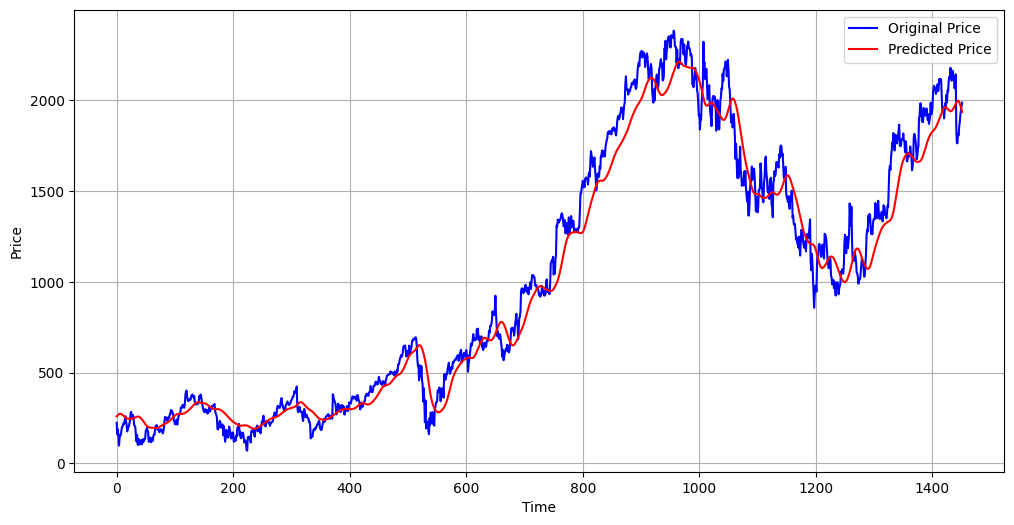

In [ ]:

plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 9.58%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9681622904728197


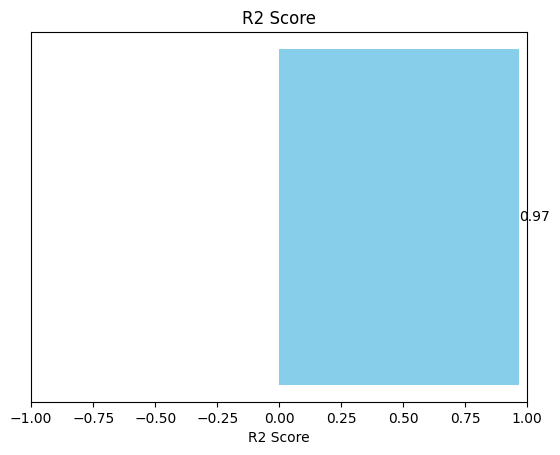

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

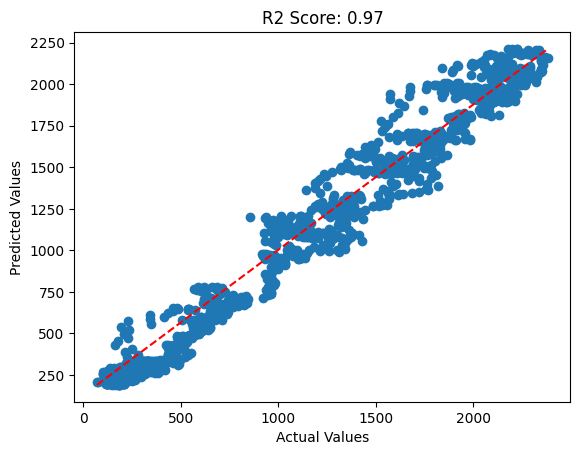

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()